# Pivot‑Table Practice Lab (21 Questions)

Each question simulates a small DataFrame.  
**Your task:** create the requested pivot table (or tidy reshape) *below the simulation cell*.
Once you are finished, you can meet with your group. 

---



# Tidy Data Frame

A **tidy data frame** follows three simple rules:

1. **Each variable** is a column.  
2. **Each observation** (or case) is a row.  
3. **Each value** is a single cell.

For example, this is _tidy_:

| country | year | population |
| ------- | ---- | ---------- |
| A       | 2000 | 1,000,000  |
| A       | 2010 | 1,100,000  |
| B       | 2000 | 500,000    |
| B       | 2010 | 600,000    |


Here “country”, “year”, and “population” are each their own columns, and every row is one observation.

---

# Pivot Table

A **pivot table** is a way to **reshape** and **summarize** data:

- **Rows** and **columns** become grouping variables.  
- **Cell values** are computed by applying an aggregation (sum, mean, count, etc.) to the data in each group.

Using the same data, a pivot table showing population by country and year might look like:

| country | 2000      | 2010      |
| ------- | --------- | --------- |
| A       | 1,000,000 | 1,100,000 |
| B       | 500,000   | 600,000   |


Here we’ve “pivoted” the year values into separate columns and filled in the population.

---

# Wide vs. Long Format

- **Wide format**  
  - Variables that could be rows (e.g. “year”) become separate columns.  
  - Good for human‐readable tables or specific plotting functions.  

| country | pop\_2000 | pop\_2010 |
| ------- | --------- | --------- |
| A       | 1,000,000 | 1,100,000 |
| B       | 500,000   | 600,000   |


- **Long format**  
- Each row is one measurement; variable names live in a single column, with their values in another.  
- Ideal for most data‐analysis and plotting libraries (e.g., pandas “melt”).

| country | year | population |
| ------- | ---- | ---------- |
| A       | 2000 | 1,000,000  |
| A       | 2010 | 1,100,000  |
| B       | 2000 | 500,000    |
| B       | 2010 | 600,000    |



# Useful commands

In [177]:
import pandas as pd

# Sample long DataFrame
df = pd.DataFrame({
  'country': ['A','A','B','B'],
  'year':    [2000,2010,2000,2010],
  'population': [1_000_000,1_100_000,500_000,600_000]
})

In [178]:
# 1. Long → Wide with pivot (no aggregation)
df_wide = df.pivot(index='country', columns='year', values='population')

df_wide

year,2000,2010
country,,
A,1000000,1100000
B,500000,600000


In [179]:
# 2. Long → Wide with aggregation (sum, mean, etc.)
df_pt = df.pivot_table(
  index='country',
  columns='year',
  values='population',
  aggfunc='sum'
)

df_pt

year,2000,2010
country,,
A,1000000,1100000
B,500000,600000


In [180]:
# 3. Wide → Long with melt
df_wide_reset = df_wide.reset_index()  # bring 'country' back to a column
df_long = df_wide_reset.melt(
  id_vars='country',
  var_name='year',
  value_name='population'
)

df_long

,country,year,population
0,A,2000,1000000
1,B,2000,500000
2,A,2010,1100000
3,B,2010,600000


In [181]:
# 4. Tidying a more complex wide table
# Suppose you have separate year columns: pop_2000, pop_2010
df2 = pd.DataFrame({
  'country': ['A','B'],
  'pop_2000': [1_000_000, 500_000],
  'pop_2010': [1_100_000, 600_000]
})
df2_long = df2.melt(
  id_vars='country',
  value_vars=['pop_2000','pop_2010'],
  var_name='year',
  value_name='population'
)
# Clean up 'year' values
df2_long['year'] = df2_long['year'].str.replace('pop_','').astype(int)

df2_long

,country,year,population
0,A,2000,1000000
1,B,2000,500000
2,A,2010,1100000
3,B,2010,600000


## Question 1 — Region × Units Sold

Create a pivot table that shows **total units** sold in each region (i.e. region | units, use pd.pivot_table)

In [182]:
import pandas as pd, numpy as np
np.random.seed(0)
regions = ['North','South','East','West']
items = ['Widget']
df = pd.DataFrame({
    'region': np.random.choice(regions, size=20),
    'item': 'Widget',
    'units': np.random.randint(1, 11, 20)
})
df.head()

,region,item,units
0,North,Widget,7
1,West,Widget,8
2,South,Widget,8
3,North,Widget,9
4,West,Widget,2


In [183]:
pivot = df.pivot_table(index='region', columns='item', values='units', aggfunc='sum')

pivot

item,Widget
region,
East,4
North,36
South,26
West,46


<details><summary><strong>Show Solution</strong></summary>

```python
pd.pivot_table(df, index='region', values='units', aggfunc='sum')
```

</details>

## Question 2 — Average Temperature per City

Compute the **average temperature** for each city using a pivot table (use pivot_table)

In [184]:
np.random.seed(1)
cities = ['Boston','Chicago','Seattle']
dates = pd.date_range('2025-07-01', periods=15)
df = pd.DataFrame({
    'city': np.random.choice(cities, size=45),
    'date': np.tile(dates, 3),
    'temp_C': np.random.normal(25, 3, 45)
})
df.head()


,city,date,temp_C
0,Chicago,2025-07-01,26.601433
1,Boston,2025-07-02,24.724080
2,Boston,2025-07-03,30.741461
3,Chicago,2025-07-04,25.992391
4,Chicago,2025-07-05,28.425828


In [185]:
new_df = df.pivot_table(index='city', values='temp_C', aggfunc='mean')

new_df

,temp_C
city,
Boston,24.596432
Chicago,25.396862
Seattle,26.058069


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='city', values='temp_C', aggfunc='mean')
```

</details>

## Question 3 — Count Students by Grade

Produce a pivot table counting how many students earned each grade.

In [186]:
np.random.seed(2)
grades = ['A','B','C','D']
df = pd.DataFrame({
    'student_id': range(1,51),
    'grade': np.random.choice(grades, 50)
})
df.head()


,student_id,grade
0,1,A
1,2,D
2,3,B
3,4,A
4,5,C


In [187]:
table = df.pivot_table(index='grade', aggfunc='count')

table

,student_id
grade,
A,12
B,7
C,12
D,19


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='grade', values='student_id', aggfunc='count')
```

</details>

## Question 4 — Quarterly Department Expenses

Pivot the table so **quarters become columns** and expenses fill values. Use pd.pivot.

In [188]:
np.random.seed(3)
depts = ['HR','IT','Sales']
quarters = ['Q1','Q2','Q3','Q4']
records = [(d,q,np.random.randint(5000,20000)) for d in depts for q in quarters]
df = pd.DataFrame(records, columns=['department','quarter','expense'])
df.head()



,department,quarter,expense
0,HR,Q1,10994
1,HR,Q2,6688
2,HR,Q3,16513
3,HR,Q4,14859
4,IT,Q1,14160


In [189]:
pivot_table = df.pivot(index='department', columns='quarter', values='expense')

pivot_table

quarter,Q1,Q2,Q3,Q4
department,,,,
HR,10994,6688,16513,14859
IT,14160,11400,13981,16261
Sales,7707,19026,16115,12161


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot(index='department', columns='quarter', values='expense')
```

</details>

## Question 5 — Wide‑to‑Long Patient BP

Melt the DataFrame to long form with columns: patient, day, bp.

In [190]:
np.random.seed(4)
df = pd.DataFrame({
    'patient':['P1','P2','P3'],
    'day1': np.random.randint(110,130,3),
    'day2': np.random.randint(110,130,3),
    'day3': np.random.randint(110,130,3)
})
df


,patient,day1,day2,day3
0,P1,124,118,119
1,P2,115,118,117
2,P3,111,128,123


In [191]:
df_melted = df.melt(id_vars='patient', var_name='day', value_name='bp')

df_melted

,patient,day,bp
0,P1,day1,124
1,P2,day1,115
2,P3,day1,111
3,P1,day2,118
4,P2,day2,118
5,P3,day2,128
6,P1,day3,119
7,P2,day3,117
8,P3,day3,123


<details><summary><strong>Show Solution</strong></summary>

```python
df_long = df.melt(id_vars='patient', var_name='day', value_name='bp')
```

</details>

## Question 6 — Mean Score by Class & Subject

Pivot to show **average score** per class (rows) and subject (columns).

In [192]:
np.random.seed(5)
classes = ['A','B']
subjects = ['Math','History','Science']
records=[(c,s,np.random.randint(50,101)) for c in classes for s in subjects for _ in range(5)]
df=pd.DataFrame(records, columns=['class','subject','score'])
df.head()

,class,subject,score
0,A,Math,85
1,A,Math,64
2,A,Math,97
3,A,Math,88
4,A,Math,66


In [193]:
table = df.pivot_table(index='class', columns='subject', values='score', aggfunc='mean')

table

subject,History,Math,Science
class,,,
A,73.8,80.0,72.6
B,73.2,79.2,69.8


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='class', columns='subject', values='score', aggfunc='mean')
```

</details>

## Question 7 — Satisfaction Counts by Gender

Count satisfied vs not by gender (rows=gender, cols=satisfied).

In [194]:
np.random.seed(6)
df = pd.DataFrame({
    'gender': np.random.choice(['F','M'], 30),
    'satisfied': np.random.choice([0,1], 30)
})
df.head()


,gender,satisfied
0,F,1
1,M,0
2,M,1
3,F,1
4,F,0


In [195]:
table = df.pivot_table(index='gender', values='satisfied', aggfunc='sum')

table

,satisfied
gender,
F,12
M,4


<details><summary><strong>Show Solution</strong></summary>

```python
pd.pivot_table(df, index='gender', columns='satisfied', values='satisfied', aggfunc='count', fill_value=0)
```

</details>

## Question 8 — Handle Missing Units Before Pivot

Fill missing units with 0, then sum units per store×category.

In [196]:
np.random.seed(7)
df = pd.DataFrame({
    'store': np.random.choice(['A','B','C'], 15),
    'category': np.random.choice(['X','Y'], 15),
    'units': np.random.randint(1,20,15).astype(float)
})
# Introduce missing
df.loc[df.sample(5).index, 'units'] = np.nan
df.head()


,store,category,units
0,A,Y,17.0
1,B,Y,NaN
2,C,X,NaN
3,A,X,10.0
4,B,Y,15.0


In [197]:
df = df.fillna(0)

df_table = df.pivot_table(index='store', columns='category', values='units', aggfunc='sum')

df_table

category,X,Y
store,,
A,16.0,26.0
B,15.0,15.0
C,4.0,24.0


<details><summary><strong>Show Solution</strong></summary>

```python
df_filled = df.fillna({'units':0})
df_filled.pivot_table(index='store', columns='category', values='units', aggfunc='sum')
```

</details>

## Question 9 — Split Year‑Month Column

Split year_month into separate year and month columns, then pivot to show total sales by month (columns) for each year.

In [198]:
np.random.seed(8)
df = pd.DataFrame({
    'year_month': ['2025-01','2025-02','2025-01','2025-02'],
    'sales': np.random.randint(100,200,4)
})
df



,year_month,sales
0,2025-01,167
1,2025-02,184
2,2025-01,105
3,2025-02,190


In [199]:
def turn_month(month):
    s = month
    if month[0] == '0':
        s[:-1]
    return int(month)


df[['year', 'month']] = df['year_month'].str.split('-', expand=True)

df['year'] = df['year'].astype(int)

df['month'] = df['month'].apply(turn_month)

df = df.drop(columns='year_month')

table = df.pivot_table(index='year', columns='month', values='sales', aggfunc='sum')

table

month,1,2
year,,
2025,272,374


<details><summary><strong>Show Solution</strong></summary>

```python
df[['year','month']] = df['year_month'].str.split('-', expand=True)
df.pivot_table(index='year', columns='month', values='sales', aggfunc='sum')
```

</details>

## Question 10 — Trim Whitespace Categories

Strip whitespace in 'team ' column, then average score per team.

In [200]:
np.random.seed(9)
df = pd.DataFrame({
    'team ': [' Red','Blue ',' Red','Blue '],
    'score': np.random.randint(10,30,4)
})
df


,team,score
0,Red,11
1,Blue,18
2,Red,27
3,Blue,11


In [201]:
df['team '] = df['team '].str.strip()

table = df.pivot_table(index='team ', aggfunc='mean')

table

,score
team,
Blue,14.5
Red,19.0


<details><summary><strong>Show Solution</strong></summary>

```python
df['team '] = df['team '].str.strip()
df.pivot_table(index='team ', values='score', aggfunc='mean')
```

</details>

## Question 11 — Duplicate Keys Needing Aggregation

Create a pivot table of **total revenue** per date with products as columns.

In [202]:
np.random.seed(10)
df = pd.DataFrame({
    'date': pd.date_range('2025-01-01', periods=6, freq='D').repeat(2),
    'product': ['A','B']*6,
    'revenue': np.random.randint(50,150,12)
})
df.head()


,date,product,revenue
0,2025-01-01,A,59
1,2025-01-01,B,65
2,2025-01-02,A,114
3,2025-01-02,B,78
4,2025-01-03,A,139


In [203]:
table = df.pivot_table(index='date', columns='product', values='revenue', aggfunc='sum')

table

product,A,B
date,,
2025-01-01,59,65
2025-01-02,114,78
2025-01-03,139,143
2025-01-04,79,58
2025-01-05,123,50
2025-01-06,90,86


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='date', columns='product', values='revenue', aggfunc='sum')
```

</details>

## Question 12 — Mean & Std in Same Pivot

Produce pivot with both mean and std of measure for each group.

In [204]:
np.random.seed(11)
df = pd.DataFrame({
    'group': np.random.choice(['G1','G2'], 30),
    'measure': np.random.normal(0,1,30)
})
df.head()


,group,measure
0,G2,-0.138082
1,G2,0.038107
2,G1,-0.348426
3,G2,-0.727205
4,G2,0.472204


In [205]:
table = df.pivot_table(index='group', aggfunc=['mean', 'std'])

table

,mean,std
,measure,measure
group,,
G1,-0.254744,0.951633
G2,-0.050687,0.760760


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='group', values='measure', aggfunc=['mean','std'])
```

</details>

## Question 13 — Remove Duplicates Before Pivot

Keep only the latest status per id (keep first occurrence), then pivot status as columns and value as values.

In [206]:
np.random.seed(12)
df = pd.DataFrame({
    'id': np.r_[np.arange(1,6), np.arange(1,6)],
    'status': ['new','old']*5,
    'value': np.random.randint(1,100,10)
})
df

,id,status,value
0,1,new,76
1,2,old,28
2,3,new,7
3,4,old,3
4,5,new,4
5,1,old,68
6,2,new,77
7,3,old,49
8,4,new,23
9,5,old,50


In [207]:
df = df.drop_duplicates('id')

df = df.pivot(index='id', columns='status', values='value')

df

status,new,old
id,,
1,76.0,NaN
2,NaN,28.0
3,7.0,NaN
4,NaN,3.0
5,4.0,NaN


<details><summary><strong>Show Solution</strong></summary>

```python
latest = df.drop_duplicates('id', keep='first')
latest.pivot(index='id', columns='status', values='value')
```

</details>

## Question 14 — Monthly Sales Trend

Convert 'date' to datetime, extract month, then sum sales per month.

In [208]:
np.random.seed(13)
dates = pd.date_range('2025-01-01','2025-06-30', freq='D')
df = pd.DataFrame({
    'date': np.random.choice(dates, 100),
    'sales': np.random.randint(20,80,100)
})
df.head()

,date,sales
0,2025-03-24,29
1,2025-06-26,70
2,2025-03-16,68
3,2025-01-17,22
4,2025-04-09,38


In [209]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month_name()

df = df.pivot_table(index='month', values='sales', aggfunc='sum')

df

,sales
month,
April,469
February,547
January,1171
June,1121
March,900
May,1115


<details><summary><strong>Show Solution</strong></summary>

```python
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
df.pivot_table(index='month', values='sales', aggfunc='sum')
```

</details>

## Question 15 — Sensor Readings Wide to Long

Melt to long form with columns timestamp, sensor, reading.

In [210]:
np.random.seed(14)
df = pd.DataFrame({
    'timestamp': pd.date_range('2025-07-15 00:00', periods=5, freq='h'),
    'sensorA': np.random.rand(5),
    'sensorB': np.random.rand(5)
})
df


,timestamp,sensorA,sensorB
0,2025-07-15 00:00:00,0.513943,0.957604
1,2025-07-15 01:00:00,0.773165,0.513117
2,2025-07-15 02:00:00,0.870428,0.318284
3,2025-07-15 03:00:00,0.008047,0.539200
4,2025-07-15 04:00:00,0.309736,0.221255


In [211]:
df = df.melt(id_vars='timestamp', var_name='sensor', value_name='reading')

df

,timestamp,sensor,reading
0,2025-07-15 00:00:00,sensorA,0.513943
1,2025-07-15 01:00:00,sensorA,0.773165
2,2025-07-15 02:00:00,sensorA,0.870428
3,2025-07-15 03:00:00,sensorA,0.008047
4,2025-07-15 04:00:00,sensorA,0.309736
5,2025-07-15 00:00:00,sensorB,0.957604
6,2025-07-15 01:00:00,sensorB,0.513117
7,2025-07-15 02:00:00,sensorB,0.318284
8,2025-07-15 03:00:00,sensorB,0.539200
9,2025-07-15 04:00:00,sensorB,0.221255


<details><summary><strong>Show Solution</strong></summary>

```python
df_long = df.melt(id_vars='timestamp', var_name='sensor', value_name='reading')
```

</details>

## Question 16 — Compute Conversion Rate

Pivot to compute **conversion rate** (mean of converted) per campaign.

In [212]:
np.random.seed(15)
df = pd.DataFrame({
    'campaign': np.random.choice(['Email','Ads'], 50),
    'converted': np.random.choice([0,1], 50)
})
df.head()


,campaign,converted
0,Email,0
1,Ads,0
2,Email,0
3,Ads,1
4,Ads,0


In [213]:
table = df.pivot_table(index='campaign', aggfunc='mean')

table

,converted
campaign,
Ads,0.433333
Email,0.450000


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='campaign', values='converted', aggfunc='mean')
```

</details>

## Question 17 — Split Category/Subcategory

Separate cat_sub into cat and sub, then sum qty with cat rows and sub columns.

In [214]:
np.random.seed(16)
df = pd.DataFrame({
    'cat_sub': ['A_X','A_Y','B_X','B_Y']*5,
    'qty': np.random.randint(1,5,20)
})
df.head()


,cat_sub,qty
0,A_X,2
1,A_Y,3
2,B_X,2
3,B_Y,2
4,A_X,2


In [215]:
df[['cat', 'sub']] = df['cat_sub'].str.split('_', expand=True)

table = df.pivot_table(index='cat', columns='sub', values='qty', aggfunc='sum')

table

sub,X,Y
cat,,
A,12,14
B,7,9


<details><summary><strong>Show Solution</strong></summary>

```python
df[['cat','sub']] = df['cat_sub'].str.split('_', expand=True)
df.pivot_table(index='cat', columns='sub', values='qty', aggfunc='sum')
```

</details>

## Question 18 — Ordered Categories in Pivot

Set 'priority' as categorical ordered low<medium<high, then count tickets per priority (rows).

In [216]:
np.random.seed(17)
df = pd.DataFrame({
    'priority': np.random.choice(['low','medium','high'], 30),
    'tickets': 1
})
df.head()


,priority,tickets
0,medium,1
1,high,1
2,high,1
3,medium,1
4,low,1


In [217]:
df['priority'] = pd.Categorical(values=df['priority'], categories=['low', 'medium', 'high'], ordered=True)

table = df.pivot_table(index='priority', aggfunc='sum')

table

/var/folders/l5/c83q5w7j3wvcv1kvpg3d5qc80000gn/T/ipykernel_83236/891574193.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = df.pivot_table(index='priority', aggfunc='sum')


,tickets
priority,
low,6
medium,14
high,10


<details><summary><strong>Show Solution</strong></summary>

```python
df['priority'] = pd.Categorical(df['priority'], categories=['low','medium','high'], ordered=True)
df.pivot_table(index='priority', values='tickets', aggfunc='count').sort_index()
```

</details>

## Question 19 — Value Vars Melt Then Pivot

Melt height and weight into long, then compute average of each measure.

In [218]:
np.random.seed(18)
df = pd.DataFrame({
    'id': range(1,6),
    'height_cm': np.random.randint(150,190,5),
    'weight_kg': np.random.randint(50,90,5)
})
df


,id,height_cm,weight_kg
0,1,169,84
1,2,155,67
2,3,152,55
3,4,158,71
4,5,174,60


In [219]:
df = df.melt(id_vars='id', var_name='measure', value_name='value')

print(df.head())

table = df.pivot_table(index='measure', values='value', aggfunc='mean')

table

   id    measure  value
0   1  height_cm    169
1   2  height_cm    155
2   3  height_cm    152
3   4  height_cm    158
4   5  height_cm    174


,value
measure,
height_cm,161.6
weight_kg,67.4


<details><summary><strong>Show Solution</strong></summary>

```python
long = df.melt(id_vars='id', var_name='measure', value_name='value')
long.pivot_table(index='measure', values='value', aggfunc='mean')
```

</details>

## Question 20 — Outlier Filter Then Multi‑Metric Pivot

Filter out profits > 180, then compute mean & std profit per branch.

In [220]:
np.random.seed(19)
df = pd.DataFrame({
    'branch': np.random.choice(['East','West'], 100),
    'profit': np.random.normal(100,20,100)
})
# add outliers
df.loc[np.random.choice(df.index, 5, replace=False),'profit'] += 200
df.head()

,branch,profit
0,West,108.309638
1,East,85.962477
2,West,103.709289
3,East,109.366996
4,East,100.790467


In [221]:
df = df[df['profit'] <= 180]

table = df.pivot_table(index='branch', aggfunc=['mean', 'std'])

table

,mean,std
,profit,profit
branch,,
East,94.978139,16.599105
West,99.304872,18.515838


<details><summary><strong>Show Solution</strong></summary>

```python
clean = df[df['profit']<=180]
clean.pivot_table(index='branch', values='profit', aggfunc=['mean','std'])
```

</details>

## Question 21: End‑to‑End Tidy Data & Exploratory Analysis

**Objective:**  
Practice the full workflow of acquiring real data, cleaning it into tidy form, performing exploratory visualizations, and communicating your first impressions.

---

### 1. Data Acquisition

1. **Choose a dataset**  
   - Find any publicly‑available CSV file online (e.g. Kaggle, UCI Machine Learning Repository, data.gov).  
2. **Download the file**  
   - Save it into your project folder as `data/your_dataset.csv`.  
   - Note the source URL and a brief description (what it measures, number of rows, columns).

---

### 2. Loading & Initial Inspection

1. **Import pandas**  
   - import pandas as pd  
2. **Read the CSV**  
   - df = pd.read_csv("data/your_dataset.csv")  
3. **Peek at the data**  
   - df.head()  
   - df.info()  
   - df.describe()

---

### 3. Tidying the Data

Follow the tidy‑data principles: one variable per column, one observation per row, one value per cell.

1. **Identify issues**  
   - Are there multiple measures in one column?  
   - Are columns encoding two variables (e.g. `2019_sales` and `2020_sales`)?  
   - Are any column names unclear or inconsistent?  
2. **Reshape as needed**  
   - Melt wide → long: df_long = df.melt(id_vars=[…], var_name="variable", value_name="value")  
   - Pivot long → wide: df_wide = df_long.pivot(index=[…], columns="variable", values="value")  
3. **Rename & convert**  
   - Standardize column names.  
   - Convert data types: df["date"] = pd.to_datetime(df["date"]), df["category"] = df["category"].astype("category")  
4. **Handle missing or duplicate data**  
   - Drop or impute missing values as appropriate.  
   - Remove exact duplicate rows: df = df.drop_duplicates()

---

### 4. Exploratory Data Analysis (EDA)

Create at least **three** different plots to understand structure or patterns. Examples:

- **Univariate distribution:** histogram or density plot of a numeric variable  
- **Bivariate relationship:** scatterplot of two continuous variables; boxplot or violin plot grouped by category  
- **Time series or trend:** line plot over time (if applicable)  
- **Categorical counts (optional):** bar chart of categorical frequencies  

Be sure to label axes, add titles, and choose sensible figure sizes.

---

### 5. Insights & Interpretation

Write **1–2 clear sentences** describing the most interesting pattern(s).  
Examples:  
- “Sales peak in Q4 each year, suggesting a strong holiday effect.”  
- “Advertising spend and website visits show a strong positive correlation (r ≈ 0.7).”


Challenge: how can you ensure that any one is able to download this data and make sure they get the same exact answer as you?




In [222]:
import pandas as pd

df = pd.read_csv('data/wemby_stats.csv')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      82 non-null     float64
 1   Gcar    46 non-null     float64
 2   Gtm     82 non-null     float64
 3   Date    82 non-null     object 
 4   Team    82 non-null     object 
 5   HA      41 non-null     object 
 6   Opp     82 non-null     object 
 7   Result  83 non-null     object 
 8   GS      83 non-null     object 
 9   MP      83 non-null     object 
 10  FG      83 non-null     object 
 11  FGA     83 non-null     object 
 12  FG%     83 non-null     object 
 13  3P      83 non-null     object 
 14  3PA     83 non-null     object 
 15  3P%     83 non-null     object 
 16  2P      83 non-null     object 
 17  2PA     83 non-null     object 
 18  2P%     83 non-null     object 
 19  eFG%    83 non-null     object 
 20  FT      83 non-null     object 
 21  FTA     83 non-null     object 
 22  FT% 

,Rk,Gcar,Gtm
count,82.000000,46.000000,82.000000
mean,31.414634,94.500000,41.500000
std,15.243660,13.422618,23.815261
min,1.000000,72.000000,1.000000
25%,18.000000,83.250000,21.250000
50%,36.500000,94.500000,41.500000
75%,46.000000,105.750000,61.750000
max,46.000000,117.000000,82.000000


In [223]:
df['HA'] = df['HA'].fillna('vs')

df = df.dropna(subset=['Gcar'])

df['Date'] = pd.to_datetime(df['Date'])

df[['W/L', 'Score', 'OT']] = df['Result'].str.split(' ', expand=True)

df['OT'] = df['OT'].apply(lambda x: x == '(OT)').astype(bool)

df = df.drop(columns='Result')

df['GmSc'] = pd.to_numeric(df['GmSc'], errors='coerce')

df['PTS'] = pd.to_numeric(df['PTS'], errors='coerce')

df

,Rk,Gcar,Gtm,Date,Team,HA,Opp,GS,MP,FG,...,STL,BLK,TOV,PF,PTS,GmSc,+/-,W/L,Score,OT
0,1.0,72.0,1.0,2024-10-24,SAS,@,DAL,1,28:28,5,...,0,1,4,1,17,6.9,-20,L,109-120,False
1,2.0,73.0,2.0,2024-10-26,SAS,vs,HOU,1,30:12,10,...,0,3,3,3,29,21.8,0,W,109-106,False
2,3.0,74.0,3.0,2024-10-28,SAS,vs,HOU,1,35:13,6,...,0,4,4,3,14,15.3,-7,L,101-106,False
3,4.0,75.0,4.0,2024-10-30,SAS,@,OKC,1,27:15,1,...,0,3,4,0,6,5.2,-4,L,93-105,False
4,5.0,76.0,5.0,2024-10-31,SAS,@,UTA,1,33:33,9,...,5,5,3,3,25,27.3,43,W,106-88,False
5,6.0,77.0,6.0,2024-11-02,SAS,vs,MIN,1,30:59,7,...,1,2,3,4,17,11.4,13,W,113-103,False
6,7.0,78.0,7.0,2024-11-04,SAS,@,LAC,1,34:06,9,...,3,9,2,3,24,25.1,-21,L,104-113,False
7,8.0,79.0,8.0,2024-11-06,SAS,@,HOU,1,24:41,6,...,1,3,4,0,15,8.9,-18,L,100-127,False
8,9.0,80.0,9.0,2024-11-07,SAS,vs,POR,1,32:21,4,...,4,3,4,0,12,10.8,-7,W,118-105,False
9,10.0,81.0,10.0,2024-11-09,SAS,vs,UTA,1,32:41,8,...,0,7,6,3,24,20.4,4,L,110-111,False


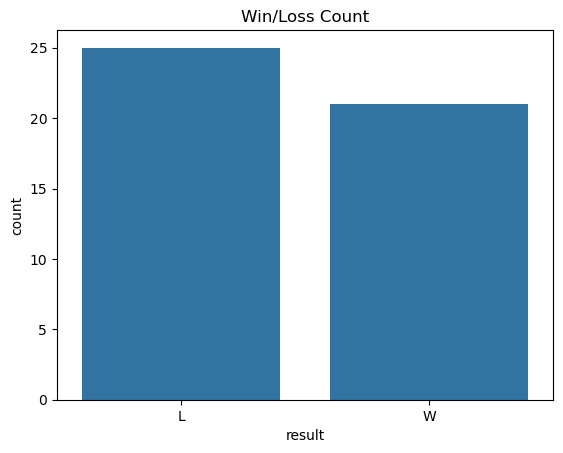

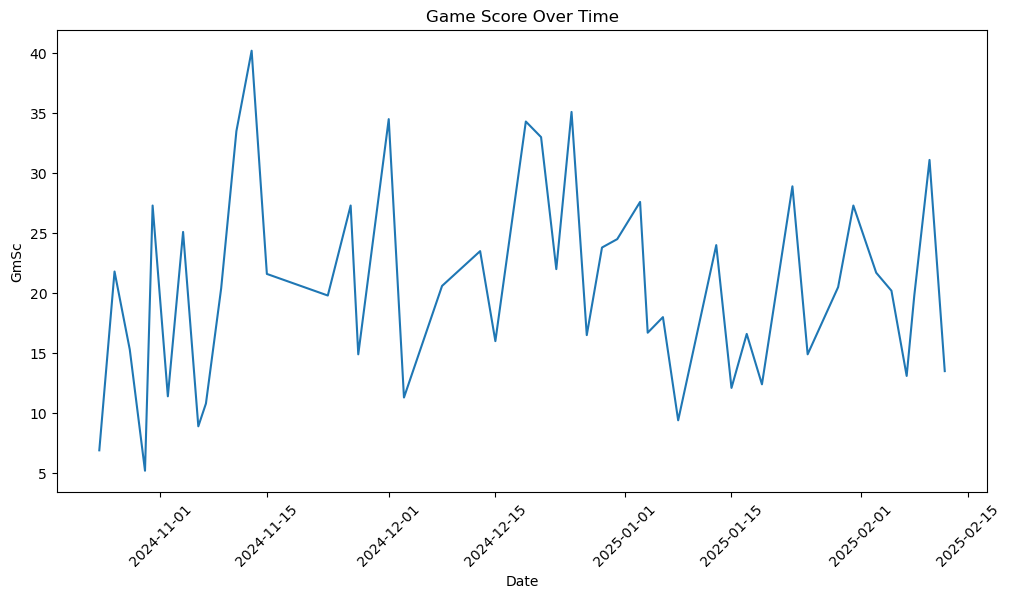

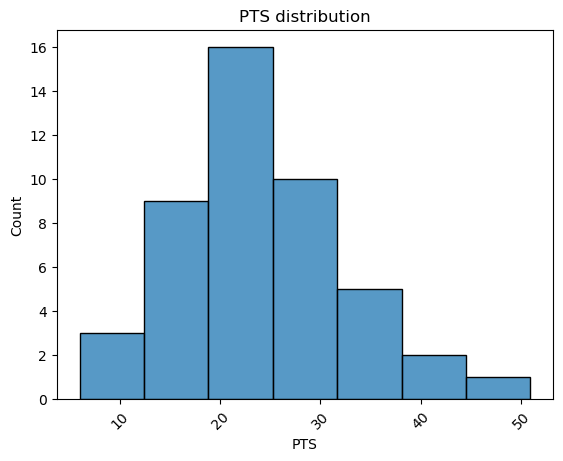

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.sort_values(by='Date')

sns.countplot(data=df, x='W/L')
plt.title('Win/Loss Count')
plt.xlabel('result')
plt.ylabel('count')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='GmSc')
plt.title("Game Score Over Time")
plt.xticks(rotation=45)
plt.show()

data = df['PTS']
n = len(data)
q75, q25 = np.percentile(data, [75, 25])
iqr = q75 - q25

width = 2 * iqr / (float(n) ** (1/3))

min_val = min(data)
max_val = max(data)
bins = np.arange(min_val, max_val + width, width)
sns.histplot(data=df, x='PTS', bins=bins)
plt.title("PTS distribution")
plt.xticks(rotation=45)
plt.show()

### Analysis

The Spurs lost 4 more games with Wemby on the court than wins

Wemby's game score is all over the place but is pretty consistently around the 20's

Wemby's Points is centered around 22 but interesting is largely symmetric